In [27]:
using JLD2
using Measurements
using Plots
using LaTeXStrings
using Statistics;

In [6]:
pgfplotsx();

In [54]:
Plots.default(
    grid = :off, box = :on,
    legend = :topright,
    widen = false,
    label = "",
)

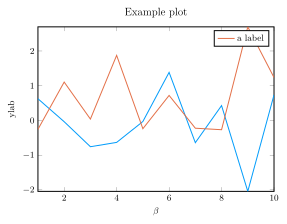

In [46]:
plot(randn(10), xlabel=L"\beta", ylabel="ylab", title="Example plot", size=(400,300))
plot!(randn(10), label="a label")

## Glauber RFIM

In [11]:
data = load("plot_data/glauber_RFIM.jld2")
T = data["T"]
m = data["m"]
m_mc = data["m_mc"];

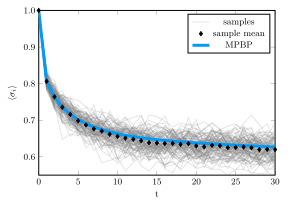

In [31]:
myblue = theme_palette(:auto)[1]
pl = plot(0:T, m_mc, label=permutedims(["samples"; fill("", length(m_mc)-1)]), c=:gray, la=0.2)
plot!(pl, 0:T, mean(m_mc), label="sample mean", c=:black, m=:diamond, ms=3, msc=:auto, st=:scatter)
plot!(pl, 0:T, m, lw=3, xlabel="t", ylabel=L"\langle\sigma_i\rangle", msc=:auto, c=myblue,
    size=(400,300), xticks=0:5:T, ms=2, label="MPBP")